# Розв'язання нелінійних рівнянь
Варіант 9, Калитюк Дар'я, ФІ-83

 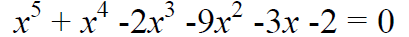
 

In [193]:
import scipy
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

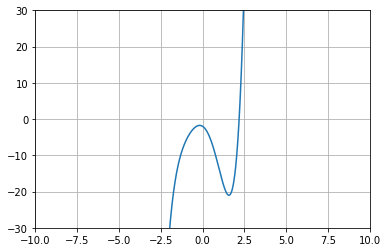

In [194]:
func = lambda x: x**5+x**4-2*x**3-9*x**2-3*x-2
plt.grid()
plt.axis([-10, 10, -30, 30])
plt.plot(x, func(x))

Теорема про кільце:

In [195]:
a_n=[-2, -3, -9, -2, 1, 1]
A=abs(max(a_n[1:], key=abs))
B=abs(max(a_n[:(len(a_n)-1)], key=abs))
print(f'A = max(|a_i|) (i=0, 1, ..., 4) = {A}\nB = max(|a_i|) (i=1, 2, ..., 5) = {B}')
left=abs(a_n[0])/(B+abs(a_n[0]))
rigth=(abs(a_n[len(a_n)-1])+A)/abs(a_n[len(a_n)-1])
print(f'Всі корені лежать у кільці: {round(left, 2)} =< |x*| =< {rigth}')

A = max(|a_i|) (i=0, 1, ..., 4) = 9
B = max(|a_i|) (i=1, 2, ..., 5) = 9
Всі корені лежать у кільці: 0.18 =< |x*| =< 10.0


Теорема про верхню межу додатніх коренів:

In [196]:
a_neg=[]
for i in range(len(a_n)):
    if a_n[i]<0: a_neg.append(a_n[i])
B=abs(max(a_neg, key=abs))
print(f'B = max(|a_i|) (a_i<0; i=0, ..., n) = {B}')
def find(a):
    m=None
    for i in reversed(range(len(a))):
        if a[i]<0:
            m=i
            print(f'm = max(i) (a_i<0; i=0, ..., n) = {i}')        
            return m
            break
    if m is None: print('Рівняння не має додатніх коренів.')

R=1+math.pow((B/a_n[len(a_n)-1]), 1/(len(a_n)-1-find(a_n)))
print(f'R = {R} - верхня межа додатніх коренів.')

B = max(|a_i|) (a_i<0; i=0, ..., n) = 9
m = max(i) (a_i<0; i=0, ..., n) = 3
R = 4.0 - верхня межа додатніх коренів.


Для знаходження нижньої межі додатніх коренів зробимо заміну x=1/y і отримаємо наступне рівняння:


Домножимо на -1:


In [197]:
a_n=[-2, -3, -9, -2, 1, 1]
a_n.reverse()
a_n=[-a for a in a_n]
print(a_n)
R=1+math.pow((B/a_n[len(a_n)-1]), 1/(len(a_n)-1-find(a_n)))
print(f'R = {round(1/(R), 2)} - нижня межа додатніх коренів.')

[-1, -1, 2, 9, 3, 2]
m = max(i) (a_i<0; i=0, ..., n) = 1
R = 0.41 - нижня межа додатніх коренів.


Для знаходження нижньої межі від'ємних коренів зробимо заміну x=-x і отримаємо наступне рівняння:


Домножимо на -1:


In [198]:
a_n=[2, -3, 9, -2, -1, 1]
R=1+math.pow((B/a_n[len(a_n)-1]), 1/(len(a_n)-1-find(a_n)))
print(f"R = {-R} - нижня межа від'ємних коренів.")

m = max(i) (a_i<0; i=0, ..., n) = 4
R = -10.0 - нижня межа від'ємних коренів.


Для знаходження верхньої межі від'ємних коренів зробимо заміну x=-1/y і отримаємо наступне рівняння:


In [199]:
a_n.reverse()
R=1+math.pow((B/a_n[len(a_n)-1]), 1/(len(a_n)-1-find(a_n)))
print(f"R = {round((-1/R), 3)} - верхня межа від'ємних коренів.")

m = max(i) (a_i<0; i=0, ..., n) = 4
R = -0.182 - верхня межа від'ємних коренів.


Теорема Гюа про наявність комплесних коренів:

In [200]:
a_n=[-2, -3, -9, -2, 1, 1]
for i in range(1, len(a_n)-1):
    if a_n[i]**2<a_n[i-1]*a_n[i+1]:
        print(f'Існує таке k, що (a_k)^2<a_(k-1)*a_(k+1), k = {i}, отже рівняння має комплексні корені')
        break
    else: 
        print('Рівняння не має комплексних коренів.')    
     

Існує таке k, що (a_k)^2<a_(k-1)*a_(k+1), k = 1, отже рівняння має комплексні корені


Теорема Штурма:

In [239]:
n=len(a_n)
a=0.41
b=4
eps=0.00001
f=np.poly1d([1, 1, -2, -9, -3, -2])
f0=f
f1=np.poly1d([5, 4, -6, -18, -3])
f2=np.poly1d(scipy.signal.deconvolve(f0, f1)[1])
f3=np.poly1d(scipy.signal.deconvolve(f1, f2)[1])
f4=np.poly1d(scipy.signal.deconvolve(f2, f3)[1])
f5=np.poly1d(scipy.signal.deconvolve(f3, f4)[1])
mas=[f2, f3, f4, f5]
for j in range(len(mas)):
    for i in range(len(mas[j])+1):
        mas[j][i]=-mas[j][i]
print(f0, ' = f0')
print(f1, ' = f1')
print(mas[0], ' = f2')
print(mas[1], ' = f3')
print(mas[2], ' = f4')
print(mas[3], ' = f5')

   5     4     3     2
1 x + 1 x - 2 x - 9 x - 3 x - 2  = f0
   4     3     2
5 x + 4 x - 6 x - 18 x - 3  = f1
      3        2
0.96 x + 5.16 x + 1.68 x + 1.88  = f2
            3         2
-3.553e-15 x - 108.2 x - 12.24 x - 41.8  = f3
            2
-2.924e+16 x - 3.307e+15 x - 1.129e+16  = f4
            2
-1.421e-14 x - 3.553e-15 x - 7.105e-15  = f5


In [240]:
pd.DataFrame({'f': ['f0', 'f1', 'f2', 'f3', 'f4', 'f5'], f'f({a})':[f'{f0(a)}', f'{f1(a)}', f'{f2(a)}', f'{f3(a)}', f'{f4(a)}', f'{f5(a)}'], f'f({b})':[f'{f0(b)}', f'{f1(b)}', f'{f2(b)}', f'{f3(b)}', f'{f4(b)}', f'{f5(b)}']})

,f,f(0.41),f(4)
0,f0,-4.8408987699,994
1,f1,-10.971627949999998,1365
2,f2,3.5023601600000003,152.6
3,f3,-65.00404947916672,-1822.0052083333353
4,f4,-1.7565132780716904e+16,-4.923349186390264e+17
5,f5,-1.0950884643534663e-14,-2.4868995751603507e-13


In [241]:
print(f'Дійсно, у точці a = {a} послідовність змінює знак 2 рази, а у точці b = {b} - 1 раз. Отже за теоремою Штурма на відрізку [{a}, {b}] буде лише один дійсний корінь(що також видно з графіку функції).')

Дійсно, у точці a = 0.41 послідовність змінює знак 2 рази, а у точці b = 4 - 1 раз. Отже за теоремою Штурма на відрізку [0.41, 4] буде лише один дійсний корінь(що також видно з графіку функції).


In [242]:
def bisection(x, y):
    z=(x+y)/2
    i=0
    while abs(x-y)>eps:
        i=i+1
        z=(x+y)/2
        if func(x)*func(z)<=0:
            y=z
        else: x=z
    return (x+y)/2, i

print(f'Метод бісекції:\nКорінь рівняння з проміжку [{a}, {b}] дорівнює: ', bisection(a, b)[0])
print('Кількість ітерацій дорівнює: ', bisection(a, b)[1]) 

Метод бісекції:
Корінь рівняння з проміжку [0.41, 4] дорівнює:  2.1825097751617433
Кількість ітерацій дорівнює:  19


In [243]:
def horda(x, y):
    i=0
    z=(x*func(y)-y*func(x))/(func(y)-func(x))
    while abs(func(z))>eps:
        i=i+1
        z=(x*func(y)-y*func(x))/(func(y)-func(x))
        if func(x)*func(z)<=0:
            y=z
        else: x=z 
    return (x*func(y)-y*func(x))/(func(y)-func(x)), i
print(f'Метод хорд:\nКорінь рівняння з проміжку [{a}, {b}] дорівнює: ', horda(a, b)[0]) 
print('Кількість ітерацій дорівнює: ', horda(a, b)[1])  

Метод хорд:
Корінь рівняння з проміжку [0.41, 4] дорівнює:  2.182512619140069
Кількість ітерацій дорівнює:  131


In [244]:
d_func=lambda x: 5*x**4+4*x**3-6*x**2-18*x-3
def newton(x, y):
    i=0
    x0=(x+y)/2
    x1=x0-func(x0)/d_func(x0)
    while(abs(func(x1))>eps):
        i=i+1
        x0=(x1+x0)/2
        x1=x0-func(x0)/d_func(x0)
    return x1, i
print(f'Метод Ньютона:\nКорінь рівняння з проміжку [{a}, {b}] дорівнює: ', newton(a, b)[0]) 
print('Кількість ітерацій дорівнює: ', newton(a, b)[1])  

Метод Ньютона:
Корінь рівняння з проміжку [0.41, 4] дорівнює:  2.1825127639725306
Кількість ітерацій дорівнює:  7


In [235]:
res_b=func(bisection(a, b)[0])
res_h=func(horda(a, b)[0])
res_n=func(newton(a, b)[0])
print(f'Бісекція: f({bisection(a, b)[0]}) = {res_b}\nХорди: f({horda(a, b)[0]}) = {res_h}\nНьютон: f({newton(a, b)[0]}) = {res_n}')
if min([res_b, res_h, res_n], key=abs)==res_b:
    print(f'Найбільш точне значення отримано методом бісекції.')
elif min([res_b, res_h, res_n], key=abs)==res_h:
    print(f'Найбільш точне значення отримано методом хорд.')
else:
    print(f'Найбільш точне значення отримано методом Ньютона.')

Бісекція: f(2.182514190673828) = 0.0001239061046618417
Хорди: f(2.182512683771484) = -2.925686072963174e-06
Ньютон: f(2.1825127505418562) = 2.694180337492469e-06
Найбільш точне значення отримано методом Ньютона.
